# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CHURN_TELECON_MOD08_TAREFA.csv to CHURN_TELECON_MOD08_TAREFA.csv


In [ ]:
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [ ]:
# Primeiramente, vamos identificar os tipos de dados:

df.dtypes

,0
customerID,object
Genero,object
Idoso,int64
Casado,object
Dependents,object
Tempo_como_Cliente,int64
PhoneService,object
Servico_Internet,object
Servico_Seguranca,object
Suporte_Tecnico,object


Observa-se que:
* **CustomerID**: Deve ser do tipo string ou object, pois é um identificador. Nesse caso, vamos mantê-lo como object.
* **Genero**: Pode ser mantido como object.
* **Idoso**, **Casado**, **Dependents**, **PhoneService**, **Suporte_Tecnico**, **StreamingTV**, **Churn**: Devem ser convertidos para o tipo int ou bool.
* **Tempo_como_Cliente**: Deve ser do tipo int.
* **Servico_Internet**, **Servico_Seguranca**, **Tipo_Contrato**, **PaymentMethod**: Permanecem como object.
* **Pagamento_Mensal** e **Total_Pago**: Devem ser convertidos para float, pois tratam-se de valores monetários.

In [ ]:
df['Idoso'] = df['Idoso'].astype(int)
df['Casado'] = df['Casado'].map({'Yes': True, 'No': False}).astype(bool)
df['Dependents'] = df['Dependents'].map({'Yes': True, 'No': False}).astype(bool)
df['PhoneService'] = df['PhoneService'].map({'Yes': True, 'No': False}).astype(bool)
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].map({'Yes': True, 'No': False}).astype(bool)
df['StreamingTV'] = df['StreamingTV'].map({'Yes': True, 'No': False}).astype(bool)
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False}).astype(bool)
df['Tempo_como_Cliente'] = df['Tempo_como_Cliente'].astype(int)
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].astype(float)
df['Total_Pago'] = df['Total_Pago'].astype(float)
df.head()
df.dtypes

,0
customerID,object
Genero,object
Idoso,int64
Casado,bool
Dependents,bool
Tempo_como_Cliente,int64
PhoneService,bool
Servico_Internet,object
Servico_Seguranca,object
Suporte_Tecnico,bool


Optei pela definição de campos como booleanos para padronização.

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [ ]:
# Exibindo as colunas com dados faltantes e %
valores_nulos = df.isnull().sum()  # Conta valores nulos por coluna
porcentagem_nulos = (valores_nulos / len(df)) * 100

print(porcentagem_nulos)
len(df)

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService           0.00
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.00
dtype: float64


2500

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [ ]:
df = df.dropna(subset=['Genero'])
df.isnull().sum()

,0
customerID,0
Genero,0
Idoso,0
Casado,0
Dependents,0
Tempo_como_Cliente,0
PhoneService,0
Servico_Internet,0
Servico_Seguranca,0
Suporte_Tecnico,0


Optei por excluir as linhas com valores ausentes na coluna 'Genero' porque representam apenas 0,48% do total de dados, um percentual pequeno que não impactará significativamente a análise. Como a proporção de dados faltantes é baixa, a exclusão dessas linhas evita a introdução de vieses ou distorções que poderiam ocorrer ao preencher os valores ausentes com uma estimativa. Dessa forma, garantimos a integridade do conjunto de dados sem comprometer a qualidade das análises.

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

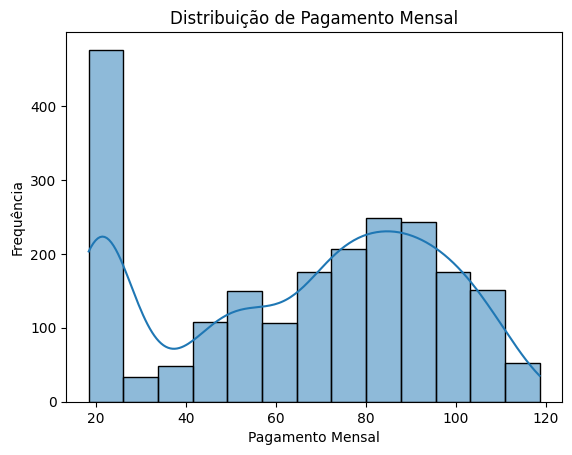

Média de Pagamento Mensal: 65.60756321839081
Mediana de Pagamento Mensal: 71.45


In [ ]:
# Plotando um histograma para ver a distribuição de Pagamento_Mensal
sns.histplot(df['Pagamento_Mensal'], kde=True)
plt.title('Distribuição de Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Frequência')
plt.show()

# Calculando Média e Mediana

media_pagamento = df['Pagamento_Mensal'].mean()
mediana_pagamento = df['Pagamento_Mensal'].median()

print(f"Média de Pagamento Mensal: {media_pagamento}")
print(f"Mediana de Pagamento Mensal: {mediana_pagamento}")


Como a mediana é maior do que a média, temos o indicativo de que a distribuição dos dados é assimétrica à esquerda, ou seja, existem alguns valores mais baixos puxando a média para baixo. Nesse caso, a mediana seria a melhor escolha para substituir os valores faltantes uma vez que representa melhor o centro dos dados sem ser influenciada por valores extremos.

In [ ]:
# Substituindo os valores nulos pela mediana
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(mediana_pagamento)
df.isnull().sum()

,0
customerID,0
Genero,0
Idoso,0
Casado,0
Dependents,0
Tempo_como_Cliente,0
PhoneService,0
Servico_Internet,0
Servico_Seguranca,0
Suporte_Tecnico,0


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma diferente e corrija.

In [ ]:
df['Genero'].unique()

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [ ]:
# Padronizando a coluna 'Genero'

df['Genero'] = df['Genero'].str.lower().map({'female': 'Female', 'f': 'Female','male': 'Male', 'm': 'Male'})

df['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Servico_Internet'].unique()

array(['DSL', 'No', 'Fiber optic', 'dsl'], dtype=object)

In [ ]:
# Padronizando a coluna 'Servico_Internet'

df['Servico_Internet'] = df['Servico_Internet'].replace('dsl','DSL')

df['Servico_Internet'].unique()

array(['DSL', 'No', 'Fiber optic'], dtype=object)

In [ ]:
df['Servico_Seguranca'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
# Padronizando a coluna 'Servico_Seguranca', aqui não julguei necessário duas "negações" diferentes.

df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('No internet service', 'No')

df['Servico_Seguranca'].unique()

array(['No', 'Yes'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [ ]:
# Renomeando as colunas para um formato padronizado

df.rename(columns={
    'CustomerID': 'customer_id',
    'Genero': 'genero',
    'Idoso': 'idoso',
    'Casado': 'casado',
    'Dependents': 'dependentes',
    'Tempo_como_Cliente': 'tempo_como_cliente',
    'PhoneService': 'servico_telefonico',
    'Servico_Internet': 'servico_internet',
    'Servico_Seguranca': 'servico_seguranca',
    'Suporte_Tecnico': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'Tipo_Contrato': 'tipo_contrato',
    'PaymentMethod': 'metodo_pagamento',
    'Pagamento_Mensal': 'pagamento_mensal',
    'Total_Pago': 'total_pago',
    'Churn': 'churn'
}, inplace=True)

df.head()

,customerID,genero,idoso,casado,dependentes,tempo_como_cliente,servico_telefonico,servico_internet,servico_seguranca,suporte_tecnico,streaming_tv,tipo_contrato,metodo_pagamento,pagamento_mensal,total_pago,churn
0,7590-VHVEG,Female,0,True,False,1,False,DSL,No,False,False,Month-to-month,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,DSL,Yes,False,False,One year,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,False,False,2,True,DSL,Yes,False,False,Month-to-month,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,False,False,45,False,DSL,Yes,True,False,One year,Bank transfer (automatic),71.45,1840.75,False
16,8191-XWSZG,Female,0,False,False,52,True,No,No,True,True,One year,Mailed check,71.45,1022.95,False
